# How well do jobs and skills pay for Data Analysts?

## Methology

Evaluate median salary for top 6 data jobs
Find median salary per skill for Data Analysts
Visualize for highest paying skills and most demanded skills

# Import Libraries and Data

In [4]:
# Importing libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset
df = pd.read_csv(r'C:\Users\ARJUN\Python_projects\Python_Course\data_jobs.csv')

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Salary Distribution by Job Title

Filter our data to only include salary values from India.

In [6]:
# filter for the job titles and country
df_IND = df[(df['job_country'] == 'India')].dropna(subset = ['salary_year_avg']).copy()

Create a list of the main job_titles in our dataset and filter our dataframe to only contain these job titles.

In [14]:
job_titles = df_IND['job_title_short'].value_counts()[0:6].index.tolist()

# filter the df_IND for the top 6 job titles
df_IND_top6 = df_IND[df_IND['job_title_short'].isin(job_titles)]

In [20]:
# order the job titles by median salary
median_salaries = df_IND_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending = False).index.tolist()
median_salaries

['Data Engineer',
 'Senior Data Engineer',
 'Data Scientist',
 'Data Analyst',
 'Machine Learning Engineer',
 'Software Engineer']

# Plot Salary Distributions

Plot the top 6 job titles salary distributions using a box plot.

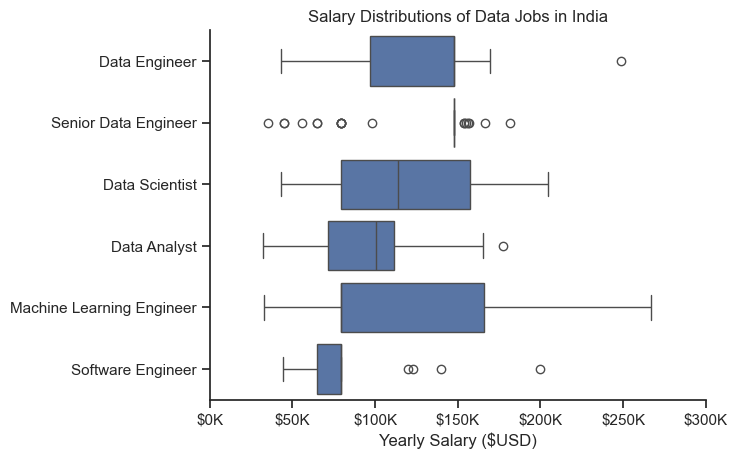

In [70]:
sns.set_theme(style = 'ticks')
sns.boxplot(data = df_IND_top6, x = 'salary_year_avg', y = 'job_title_short', order = median_salaries)

sns.despine()
plt.title('Salary Distributions of Data Jobs in India')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
plt.xlim(0, 300000)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.show()

# Insights
1. Data Scientist and Senior Data Engineer have the highest median salaries: These roles command the highest average compensation in India.
2. Data Engineer and Machine Learning Engineer have similar salary ranges: While the median salaries may vary slightly, the overall salary distribution for these roles is relatively comparable.
3. Data Analyst has a lower salary range: Compared to the other roles, Data Analysts generally have lower salaries, with a more concentrated distribution.
4. Software Engineer has the lowest salary distribution: Among the listed roles, Software Engineers have the lowest salaries, with a significant portion earning less than $50K per year.

# Investigate Median Salary Vs Skill for Data Analysts

Filters the original dataset to only get rows where the job title is **'Data Analyst'** and the country is **'India'**, to create a new DataFrame **'df_DA_IND'**. Drop NaN values from the **'salary_year_avg'** column. Then it uses the explode method on the **'job_skills'** column to create a new row in the DataFrame for each skill associated with a job. Finally, it displays the first five entries of the **'salary_year_avg'** and **'job_skills columns'**.

In [75]:
# Only get data analyst jobs in the India
df_DA_IND = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_IND = df_DA_IND.dropna(subset = ['salary_year_avg'])

df_DA_IND = df_DA_IND.explode('job_skills')
df_DA_IND[['salary_year_avg', 'job_skills']].head()

,salary_year_avg,job_skills
11412,50400.0,python
11412,50400.0,sql
11412,50400.0,aws
11412,50400.0,azure
11412,50400.0,excel


# Determine The Highest Paid Skills and Most Demanded Skills

Gets the top ten highest-paying skills for Data Analysts by calculating the median salary for each skill listed in the **'df_DA_IND'**. It groups the data by job skills, computes the median salary, sorts these values in descending order by median, and then selects the top 10. This is then formatted into a new DataFrame **'df_DA_top_pay'** with a reset index and a renamed salary column labeled **'median_salary'**.

In [79]:
df_DA_top_pay = df_DA_IND.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by = 'median', ascending = False).head(10)
df_DA_top_pay

,count,median
job_skills,,
postgresql,1,165000.0
pyspark,1,165000.0
gitlab,1,165000.0
linux,1,165000.0
mysql,1,165000.0
gdpr,2,163782.0
mongodb,6,163782.0
scala,3,163782.0
neo4j,1,163782.0


Calculates the count and median salary for each skill in **'df_DA_IND'**. It groups the data by job_skills, aggregates it to find the count and median salary for each skill, and then sorts the results by count in descending order by count. It re-sorts this subset by median salary in descending order.

In [84]:
df_DA_skills = df_DA_IND.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by = 'count', ascending = False).head(10)
df_DA_skills = df_DA_skills.head(10).sort_values(by = 'median', ascending = False)
df_DA_skills

,count,median
job_skills,,
power bi,17,111175.0
spark,11,111175.0
tableau,20,108087.5
excel,39,98500.0
sql,46,96050.0
python,36,96050.0
azure,15,93600.0
r,18,79200.0
aws,12,79200.0


Creates two horizontal bar charts:

1. Displays the highest paid skills
2. Shows the most in demand skills

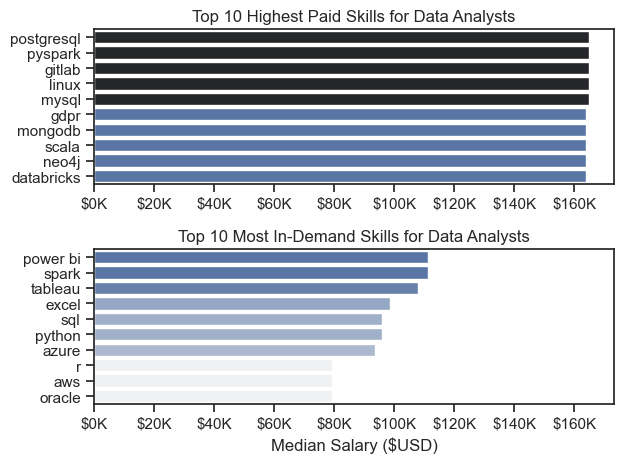

In [95]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style = 'ticks')

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data = df_DA_top_pay, x = 'median', y = df_DA_top_pay.index, ax = ax[0], hue = 'median', palette = 'dark:b_r')
ax[0].legend().remove()
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

# Top 10 Most In-Demand Skills for Data Analysts'
sns.barplot(data = df_DA_skills, x = 'median', y = df_DA_skills.index, ax = ax[1], hue = 'median', palette = 'light:b' )
ax[1].legend().remove()
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()

# Insights
1. Postgresql is the highest-paid skill: Among the top 10 highest-paid skills, Postgresql commands the highest median salary.
2. Database skills are well-compensated: Many of the highest-paid skills revolve around databases, such as Postgresql, MySQL, MongoDB, and Neo4j.
3. Cloud technologies are also in demand: Skills related to cloud platforms like Databricks, AWS, and Azure are among the most in-demand, reflecting the growing importance of cloud computing in data analysis.
4. Business intelligence tools are sought-after: Power BI, Tableau, and Excel, which are commonly used for data visualization and reporting, are among the most in-demand skills.
5. Python remains a valuable asset: Despite not being among the highest-paid skills, Python's versatility and popularity make it a highly in-demand skill for data analysts.
6. There is a gap between highest-paid and in-demand skills: While some skills, like Postgresql and Databricks, are both highly paid and in-demand, others, like Oracle and R, are in demand but may not offer the same level of compensation.